In [17]:
import gmaps
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from pprint import pprint
from config import api_key
from config import gkey

gmaps.configure(api_key=gkey)

In [18]:
files = ['Outputs/solar_energy_consumption.csv','Outputs/coal_consumption.csv',
         'Outputs/fossil_fuel_consumption.csv','Outputs/other_petroleum_consumption.csv',
         'Outputs/petroleum_coke_consumption.csv','Outputs/renewable_energy_consumption.csv',
         'Outputs/Total_energy_consumption.csv','Outputs/wind_energy_consumption.csv']
names = ['solar','coal','fossil','other_petroleum','petroleum_coke','renewable','total','wind']

In [21]:
i = 0
for file in files:
    data = pd.read_csv(file,index_col=1)
    names[i] = pd.DataFrame(data)

    names[i].drop(columns = ['Unnamed: 0','District of Columbia','United States'], inplace=True)

    names[i] = names[i].transpose()
    i += 1

In [315]:
solar = names[0]
coal = names[1]
fossil = names[2]
other_petroleum = names[3]
petroleum_coke = names[4]
renewable = names[5]
total = names[6]
wind = names[7]
variables= ['solar','coal','fossil','other_petroleum','petroleum_coke','renewable','total','wind']
fossil.head()

0,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
Alaska,580535,598664,585091,599255,632812,639233,638054,624004,637503,709028,...,148179,114046,106714,94370,79263,76965,72995,71359,64860,54634
Alabama,1679179,1719290,1723400,1689343,1740180,1783930,1785605,1616408,1824747,1921281,...,1289679,1221648,1119607,1097051,1032354,946394,905988,868157,806612,822372
Arkansas,890646,841389,940525,938207,917867,933128,909911,848957,873000,864991,...,587086,541582,495912,484656,457215,463730,426368,402264,375865,371044
Arizona,1227528,1259504,1257932,1290438,1249496,1255904,1294117,1290470,1412231,1412889,...,420086,386730,344236,341080,318872,331235,322246,305529,286116,261910
California,5756726,5784126,5689677,5750770,5690504,5553992,5746063,5859162,6096996,6334291,...,4708602,4648351,4354651,4255290,3968446,3900194,3587210,3404231,3353873,3176223


In [109]:
aqi_data = pd.read_csv('aqi_state_yearly.csv',index_col=0)
aqi_data.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Alabama,65.643435,61.277762,50.868909,53.375000,46.299320,43.773283,53.327759,56.336287,52.831524,40.421228,...,41.449868,48.870987,45.809826,43.267351,37.897339,39.936647,40.804680,41.175319,39.412726,31.261450
Alaska,45.640612,44.113225,45.405694,53.122283,54.242259,52.899379,44.340866,33.741792,31.961303,28.674847,...,30.710403,29.809251,30.862022,30.951452,30.401935,34.912449,35.473839,33.742614,33.120064,38.666667
Arizona,95.084727,96.817003,73.254949,70.970209,77.002309,79.991253,75.160338,56.081023,55.458201,56.926094,...,52.312678,51.889248,56.617562,55.287771,51.131824,52.149193,47.594218,48.779399,50.955660,41.260017
Arkansas,41.818182,36.039526,25.950207,26.542986,28.679030,31.851198,31.641148,35.479769,36.755662,30.908805,...,38.401426,42.856684,41.943857,42.144399,38.233503,36.122830,35.208935,35.391794,39.478980,35.718271
California,68.642909,65.094681,61.873941,61.742195,66.612756,66.434385,67.224194,67.290687,67.924886,64.635446,...,56.264679,54.094743,58.223466,57.134488,55.928694,56.233763,55.920850,55.076534,57.531108,39.659223


In [104]:
California_df = pd.DataFrame(aqi_data)
California_df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Alabama,65.643435,61.277762,50.868909,53.375000,46.299320,43.773283,53.327759,56.336287,52.831524,40.421228,...,41.449868,48.870987,45.809826,43.267351,37.897339,39.936647,40.804680,41.175319,39.412726,31.261450
Alaska,45.640612,44.113225,45.405694,53.122283,54.242259,52.899379,44.340866,33.741792,31.961303,28.674847,...,30.710403,29.809251,30.862022,30.951452,30.401935,34.912449,35.473839,33.742614,33.120064,38.666667
Arizona,95.084727,96.817003,73.254949,70.970209,77.002309,79.991253,75.160338,56.081023,55.458201,56.926094,...,52.312678,51.889248,56.617562,55.287771,51.131824,52.149193,47.594218,48.779399,50.955660,41.260017
Arkansas,41.818182,36.039526,25.950207,26.542986,28.679030,31.851198,31.641148,35.479769,36.755662,30.908805,...,38.401426,42.856684,41.943857,42.144399,38.233503,36.122830,35.208935,35.391794,39.478980,35.718271
California,68.642909,65.094681,61.873941,61.742195,66.612756,66.434385,67.224194,67.290687,67.924886,64.635446,...,56.264679,54.094743,58.223466,57.134488,55.928694,56.233763,55.920850,55.076534,57.531108,39.659223


In [197]:
names[0][1981].head(10)

Alaska         0
Alabama        0
Arkansas       0
Arizona        0
California     0
Colorado       0
Connecticut    0
Delaware       0
Florida        0
Georgia        0
Name: 1981, dtype: int64

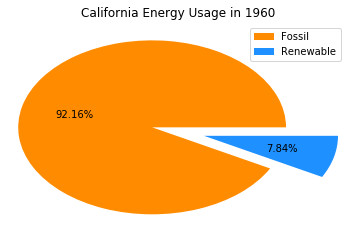

In [326]:
Cali1960Energies= [names[2],names[5]]
CaVariables= ['Fossil','Renewable']
Cali1960 = []

for x in Cali1960Energies:
    Cali1960.append(x.loc['California'][1960])
    
plt.pie(Cali1960, shadow=False, explode = [.2, .2],autopct='%.2f%%',colors=['darkorange','dodgerblue'])
plt.legend(CaVariables)
plt.title('California Energy Usage in 1960')
plt.savefig('Outputs/Images/California_1960_Energy')

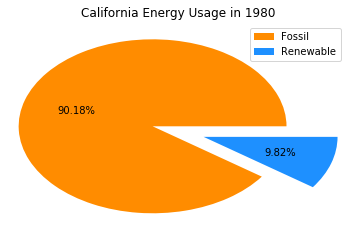

In [325]:
Cali1980Energies= [names[2],names[5]]
CaVariables= ['Fossil','Renewable']
Cali1980 = []

for x in Cali1980Energies:
    Cali1980.append(x.loc['California'][1980])
    
plt.pie(Cali1980, shadow=False, explode = [.2, .2],autopct='%.2f%%',colors=['darkorange','dodgerblue'])
plt.legend(CaVariables)
plt.title('California Energy Usage in 1980')
plt.savefig('Outputs/Images/California_1980_Energy')

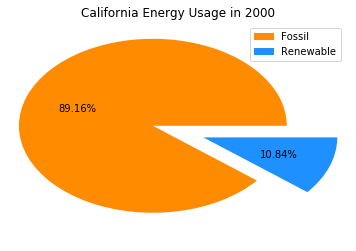

In [324]:
Cali2000Energies= [names[2],names[5]]
CaVariables= ['Fossil','Renewable']
Cali2000 = []

for x in Cali2000Energies:
    Cali2000.append(x.loc['California'][2000])
    
plt.pie(Cali2000, shadow=False, explode = [.2, .2],autopct='%.2f%%',colors=['darkorange','dodgerblue'])
plt.legend(CaVariables)
plt.title('California Energy Usage in 2000')
plt.savefig('Outputs/Images/California_2000_Energy')

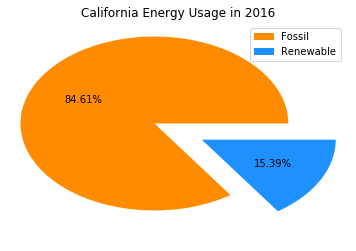

In [322]:
Cali2016Energies= [names[2],names[5]]
CaVariables= ['Fossil','Renewable']
Cali2016 = []

for x in Cali2016Energies:
    Cali2016.append(x.loc['California'][2016])
    
plt.pie(Cali2016, shadow=False, explode = [.2, .2],autopct='%.2f%%',colors=['darkorange','dodgerblue'])
plt.legend(CaVariables)
plt.title('California Energy Usage in 2016')
plt.savefig('Outputs/Images/California_2016_Energy')

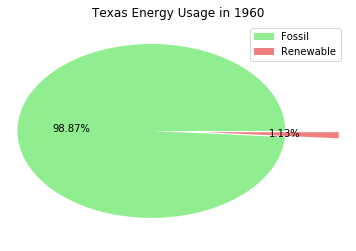

In [327]:
Tx1960Energies= [names[2],names[5]]
TxVariables= ['Fossil','Renewable']
Tx1960 = []

for x in Tx1960Energies:
    Tx1960.append(x.loc['Texas'][1960])
    
plt.pie(Tx1960, shadow=False, explode = [.2, .2],autopct='%.2f%%',colors=['lightgreen','lightcoral'])
plt.legend(TxVariables)
plt.title('Texas Energy Usage in 1960')
plt.savefig('Outputs/Images/Texas_1960_Energy')

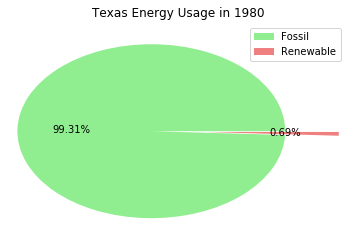

In [328]:
Tx1980Energies= [names[2],names[5]]
TxVariables= ['Fossil','Renewable']
Tx1980 = []

for x in Tx1980Energies:
    Tx1980.append(x.loc['Texas'][1980])
    
plt.pie(Tx1980, shadow=False, explode = [.2, .2],autopct='%.2f%%',colors=['lightgreen','lightcoral'])
plt.legend(TxVariables)
plt.title('Texas Energy Usage in 1980')
plt.savefig('Outputs/Images/Texas_1980_Energy')

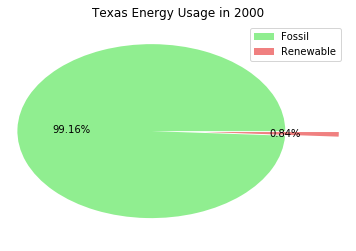

In [330]:
Tx2000Energies= [names[2],names[5]]
TxVariables= ['Fossil','Renewable']
Tx2000 = []

for x in Tx2000Energies:
    Tx2000.append(x.loc['Texas'][2000])
    
plt.pie(Tx2000, shadow=False, explode = [.2, .2],autopct='%.2f%%',colors=['lightgreen','lightcoral'])
plt.legend(TxVariables)
plt.title('Texas Energy Usage in 2000')
plt.savefig('Outputs/Images/Texas_2000_Energy')

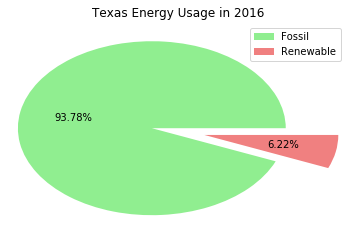

In [332]:
Tx2016Energies= [names[2],names[5]]
TxVariables= ['Fossil','Renewable']
Tx2016 = []

for x in Tx2016Energies:
    Tx2016.append(x.loc['Texas'][2016])
    
plt.pie(Tx2016, shadow=False, explode = [.2, .2],autopct='%.2f%%',colors=['lightgreen','lightcoral'])
plt.legend(TxVariables)
plt.title('Texas Energy Usage in 2016')
plt.savefig('Outputs/Images/Texas_2016_Energy')

In [288]:
print(total.iloc[5,0])

1484567


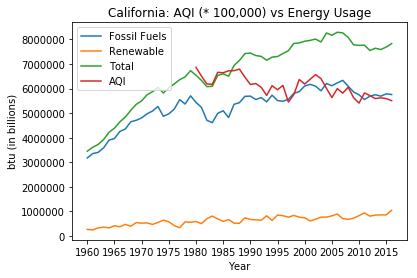

In [186]:
totalEnergies= [names[2],names[5],names[6]]
totalVariables= ['Fossil Fuels','Renewable','Total','AQI']

for x in totalEnergies:
    plt.plot(x.loc['Califronia'])
    
plt.plot(nugget,Big_chickens)
plt.legend(totalVariables)
plt.xticks(np.arange(1960,2020,5))
plt.title('California: AQI (* 100,000) vs Energy Usage')
plt.xlabel('Year')
plt.ylabel('btu (in billions)')
plt.savefig('Outputs/Images/California_Totals')

In [320]:
fossil.head()

0,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
Alaska,580535,598664,585091,599255,632812,639233,638054,624004,637503,709028,...,148179,114046,106714,94370,79263,76965,72995,71359,64860,54634
Alabama,1679179,1719290,1723400,1689343,1740180,1783930,1785605,1616408,1824747,1921281,...,1289679,1221648,1119607,1097051,1032354,946394,905988,868157,806612,822372
Arkansas,890646,841389,940525,938207,917867,933128,909911,848957,873000,864991,...,587086,541582,495912,484656,457215,463730,426368,402264,375865,371044
Arizona,1227528,1259504,1257932,1290438,1249496,1255904,1294117,1290470,1412231,1412889,...,420086,386730,344236,341080,318872,331235,322246,305529,286116,261910
California,5756726,5784126,5689677,5750770,5690504,5553992,5746063,5859162,6096996,6334291,...,4708602,4648351,4354651,4255290,3968446,3900194,3587210,3404231,3353873,3176223


([<matplotlib.axis.XTick at 0x11fc82fd0>,
 <a list of 7 Text xticklabel objects>)

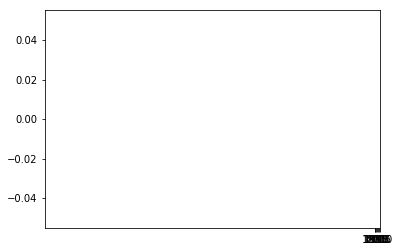

In [156]:
bla = pd.DataFrame(California_df.loc['California'])
nugget = [1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
chicken = []
for bla in bla['California']:
    chicken.append(bla)
#print (chicken)
plt.plot(y = chicken, x = nugget)
plt.xticks(np.arange(1980,2015,5))
# plt.tight_layout()


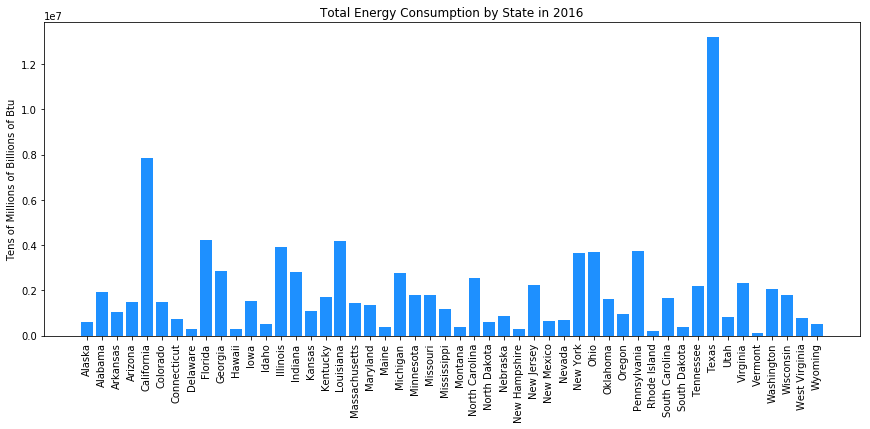

In [285]:
plt.figure(figsize=(12,6))
plt.bar(total.index, total[2016],align='center',color='dodgerblue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Total Energy Consumption by State in 2016')
plt.ylabel('Tens of Millions of Billions of Btu')
plt.savefig('Outputs/Images/State_Totals')

[6864290.930334453, 6509468.114731273, 6187394.106147274, 6174219.460442559, 6661275.62642369, 6643438.513712769, 6722419.378589309, 6729068.743650525, 6792488.608952024, 6463544.649830773, 6166555.377207061, 6203905.421423669, 6052353.896103896, 5720909.704261779, 6115229.308005427, 5951857.492521077, 6128269.241502484, 5450654.349499614, 5756287.652645862, 6367936.024371668, 6183163.677492324, 6376751.899005028, 6566473.738302591, 6403437.193594074, 6010556.756756756, 5633222.337463834, 5998518.960559866, 5812928.4164859, 6055011.629793909, 5626467.87747357, 5409474.307874609, 5822346.638092686, 5713448.805551141, 5592869.369851289, 5623376.344086021, 5592085.014796878, 5507653.437203916]
37
37


In [3]:
latlong = [
  {
    "state":"Alaska",
    "latitude":61.3850,
    "longitude":-152.2683
  },
  {
    "state":"Alabama",
    "latitude":32.7990,
    "longitude":-86.8073
  },
  {
    "state":"Arkansas",
    "latitude":34.9513,
    "longitude":-92.3809
  },
  {
    "state":"Arizona",
    "latitude":33.7712,
    "longitude":-111.3877
  },
  {
    "state":"California",
    "latitude":36.1700,
    "longitude":-119.7462
  },
  {
    "state":"Colorado",
    "latitude":39.0646,
    "longitude":-105.3272
  },
  {
    "state":"Connecticut",
    "latitude":41.5834,
    "longitude":-72.7622
  },
  {
    "state":"Delaware",
    "latitude":39.3498,
    "longitude":-75.5148
  },
  {
    "state":"Florida",
    "latitude":27.8333,
    "longitude":-81.7170
  },
  {
    "state":"Georgia",
    "latitude":32.9866,
    "longitude":-83.6487
  },
  {
    "state":"Hawaii",
    "latitude":21.1098,
    "longitude":-157.5311
  },
  {
    "state":"Iowa",
    "latitude":42.0046,
    "longitude":-93.2140
  },
  {
    "state":"Idaho",
    "latitude":44.2394,
    "longitude":-114.5103
  },
  {
    "state":"Illinois",
    "latitude":40.3363,
    "longitude":-89.0022
  },
  {
    "state":"Indiana",
    "latitude":39.8647,
    "longitude":-86.2604
  },
  {
    "state":"Kansas",
    "latitude":38.5111,
    "longitude":-96.8005
  },
  {
    "state":"Kentucky",
    "latitude":37.6690,
    "longitude":-84.6514
  },
  {
    "state":"Louisiana",
    "latitude":31.1801,
    "longitude":-91.8749
  },
  {
    "state":"Massachusetts",
    "latitude":42.2373,
    "longitude":-71.5314
  },
  {
    "state":"Maryland",
    "latitude":39.0724,
    "longitude":-76.7902
  },
  {
    "state":"Maine",
    "latitude":44.6074,
    "longitude":-69.3977
  },
  {
    "state":"Michigan",
    "latitude":43.3504,
    "longitude":-84.5603
  },
  {
    "state":"Minnesota",
    "latitude":45.7326,
    "longitude":-93.9196
  },
  {
    "state":"Missouri",
    "latitude":38.4623,
    "longitude":-92.3020
  },
  {
    "state":"Mississippi",
    "latitude":32.7673,
    "longitude":-89.6812
  },
  {
    "state":"Montana",
    "latitude":46.9048,
    "longitude":-110.3261
  },
  {
    "state":"North Carolina",
    "latitude":35.6411,
    "longitude":-79.8431
  },
  {
    "state":"North Dakota",
    "latitude":47.5362,
    "longitude":-99.7930
  },
  {
    "state":"Nebraska",
    "latitude":41.1289,
    "longitude":-98.2883
  },
  {
    "state":"New Hampshire",
    "latitude":43.4108,
    "longitude":-71.5653
  },
  {
    "state":"New Jersey",
    "latitude":40.3140,
    "longitude":-74.5089
  },
  {
    "state":"New Mexico",
    "latitude":34.8375,
    "longitude":-106.2371
  },
  {
    "state":"Nevada",
    "latitude":38.4199,
    "longitude":-117.1219
  },
  {
    "state":"New York",
    "latitude":42.1497,
    "longitude":-74.9384
  },
  {
    "state":"Ohio",
    "latitude":40.3736,
    "longitude":-82.7755
  },
  {
    "state":"Oklahoma",
    "latitude":35.5376,
    "longitude":-96.9247
  },
  {
    "state":"Oregon",
    "latitude":44.5672,
    "longitude":-122.1269
  },
  {
    "state":"Pennsylvania",
    "latitude":40.5773,
    "longitude":-77.2640
  },
  {
    "state":"Rhode Island",
    "latitude":41.6772,
    "longitude":-71.5101
  },
  {
    "state":"South Carolina",
    "latitude":33.8191,
    "longitude":-80.9066
  },
  {
    "state":"South Dakota",
    "latitude":44.2853,
    "longitude":-99.4632
  },
  {
    "state":"Tennessee",
    "latitude":35.7449,
    "longitude":-86.7489
  },
  {
    "state":"Texas",
    "latitude":31.1060,
    "longitude":-97.6475
  },
  {
    "state":"Utah",
    "latitude":40.1135,
    "longitude":-111.8535
  },
  {
    "state":"Virginia",
    "latitude":37.7680,
    "longitude":-78.2057
  },
  {
    "state":"Vermont",
    "latitude":44.0407,
    "longitude":-72.7093
  },
  {
    "state":"Washington",
    "latitude":47.3917,
    "longitude":-121.5708
  },
  {
    "state":"Wisconsin",
    "latitude":44.2563,
    "longitude":-89.6385
  },
  {
    "state":"West Virginia",
    "latitude":38.4680,
    "longitude":-80.9696
  },
  {
    "state":"Wyoming",
    "latitude":42.7475,
    "longitude":-107.2085
  }
]

In [4]:
lat_long_dat_dong = pd.DataFrame(latlong)
locations = lat_long_dat_dong[['latitude','longitude']]
amount2016 = solar_df[2016].tolist()

In [187]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=amount2016, 
                                 dissipating=False, max_intensity=10000,
                                 point_radius=1)
heat_layer

WeightedHeatmap(data_bounds=[(27.35179097809184, -131.13866045138226), (51.60243702190816, -55.28565994980204)…

In [188]:
fig.add_layer(heat_layer)

In [189]:
fig

Figure(layout=FigureLayout(height='420px'))